**Business Case: Walmart - Confidence Interval and CLT**

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [3]:
#importing all useful libraries during analysis
import pandas as pd
import numpy as np
from scipy.stats import norm,iqr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Defining Problem Statement and Analyzing basic metrics**

In [ ]:
#dataframe shape
df.shape

(550068, 10)

In [ ]:
#check null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#describe all statistical value  available in dataset
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


**Non-Graphical Analysis:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


there is no null values present in dataset

In [ ]:
df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
df["Product_ID"].value_counts().head()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

In [ ]:
# values are in percentage
print((df["Gender"].value_counts(normalize=True)*100).head())


M    75.310507
F    24.689493
Name: Gender, dtype: float64


In [ ]:
unique_gender=df.groupby(["User_ID","Gender","Age","City_Category","Marital_Status"])["Purchase"].sum().reset_index()
unique_gender["Gender"].value_counts(normalize=True)*100

M    71.719572
F    28.280428
Name: Gender, dtype: float64

In [ ]:
unique_gender

,User_ID,Gender,Age,City_Category,Marital_Status,Purchase
0,1000001,F,0-17,A,0,334093
1,1000002,M,55+,C,0,810472
2,1000003,M,26-35,A,0,341635
3,1000004,M,46-50,B,1,206468
4,1000005,M,26-35,A,1,821001
...,...,...,...,...,...,...
5886,1006036,F,26-35,B,1,4116058
5887,1006037,F,46-50,C,0,1119538
5888,1006038,F,55+,C,0,90034
5889,1006039,F,46-50,B,1,590319


This all are the Unique male and female in percentage

In [ ]:
#Values are in Percentage
df["Age"].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [ ]:
#all are unique age group in percentage
unique_gender["Age"].value_counts(normalize=True)*100

26-35    34.849771
36-45    19.809879
18-25    18.146325
46-50     9.013750
51-55     8.164997
55+       6.314717
0-17      3.700560
Name: Age, dtype: float64

observation : we can observe that between 26-35 age group is top customer

In [ ]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
#Values are in Percentage
df["City_Category"].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [ ]:
unique_gender["City_Category"].value_counts(normalize=True)*100

C    53.284672
B    28.976405
A    17.738924
Name: City_Category, dtype: float64

by this unique count we can observe the basic differnce is that city category C is top most city where most people live and city category B where most people purchase from walmart

In [ ]:
#Values are in Percentage
df["Stay_In_Current_City_Years"].value_counts(normalize=True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
#Values are in Percentage
df["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [ ]:
df["Product_Category"].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

In [ ]:
df["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
#all Purchase Bins in percentage
pd.cut(df["Purchase"],[0,5000,10000,15000,20000,25000,30000]).value_counts(normalize=True)*100

(5000, 10000]     48.302210
(15000, 20000]    17.785437
(0, 5000]         17.256594
(10000, 15000]    14.348590
(20000, 25000]     2.307169
(25000, 30000]     0.000000
Name: Purchase, dtype: float64

Customer are purchase in range between 5000 to 10000 mostly

All unique present in dataset by columns

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
unique_columns=["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]
df[unique_columns].melt().groupby(["variable","value"])[["value"]].count()/len(df)*100

value
variable                   value           
Age                        0-17    2.799102
                           18-25  18.827053
                           26-35  39.532818
                           36-45  19.912154
                           46-50   7.951086
                           51-55   7.052658
                           55+     3.924133
City_Category              A      27.248315
                           B      41.952583
                           C      30.798103
Gender                     F      24.472174
                           M      75.526828
Marital_Status             0.0    59.151485
                           1.0    40.847517
Stay_In_Current_City_Years 0      13.532318
                           1      34.887946
                           2      18.565510
                           3      17.501373
                           4+     15.511854

In [ ]:
  df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
df["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df.loc[df["Gender"]=="M"]["User_ID"].nunique()

4225

In [ ]:
df.loc[df["Gender"]=="F"]["User_ID"].nunique()

1666

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df["Marital_Status"].unique()

array([0, 1])

In [ ]:
df["Product_Category"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df["Purchase"].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [ ]:
# Users with highest number of purchases
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [ ]:
#Users with highest purchases amount
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

In [ ]:
df2=pd.DataFrame(df.groupby(['Product_Category'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


In [ ]:
df2=pd.DataFrame(df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2.sort_values(by="percent",ascending=False)

,Purchase,percent
Stay_In_Current_City_Years,,
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160
0,682979229,13.402754


Person who lives in city only for 1 years they are purchase most

**Insights**:

    1. The users with high number of purchases contribute more to the purchase
    amount. Still, we can see there are few users not in the list of top 10
    purchase counts are there in list of top 10 purchase amount. Also, the user
    1004277 with lesser purchase count(979) has a much higher purchase amount
    than the user(1001680) with top purchase count.

In [99]:
married=df.groupby(["Marital_Status","User_ID"])[["Purchase"]].sum()
married.reset_index(inplace=True)
single=married.loc[married["Marital_Status"]==0]["Purchase"]
married=married.loc[married["Marital_Status"]==1]["Purchase"]
print("average purchase by single",single.mean())
print("average purchase by married",married.mean())

average purchase by single 880575.7819724905
average purchase by married 843526.7966855295


**Insights**
single purchase more than married

In [106]:
stay=df.groupby(["Stay_In_Current_City_Years","User_ID"])[["Purchase"]].sum()
stay.reset_index(inplace=True)
stay.groupby(["Stay_In_Current_City_Years"])[["Purchase"]].sum().sort_values(by="Purchase",ascending=False)

,Purchase
Stay_In_Current_City_Years,
1,1792872533
2,949173931
3,884902659
4+,785884390
0,682979229


**Insights**

customers who stay in city only for 1 years they purchase more than other customers

**Average expenses by Male**

In [ ]:
gender_purchase=df.groupby(["User_ID","Gender"]).agg({"Purchase":"sum"}).sort_values(by="Purchase",ascending=False).reset_index()
print("median_male_purchase",gender_purchase.loc[gender_purchase["Gender"]=="M"]["Purchase"].median())
print("mean_male_purchase",gender_purchase.loc[gender_purchase["Gender"]=="M"]["Purchase"].mean())

median_male_purchase 578540.0
mean_male_purchase 925344.4023668639


**Insights**

There is huge difference between male_mean_purchase and male_median_purchase
so it means there is outlier too

**Average expenses by Female**

In [ ]:
print("mean_Purchase_female",gender_purchase.loc[gender_purchase["Gender"]=='F']["Purchase"].mean())
print("median_Purchase_female",gender_purchase.loc[gender_purchase["Gender"]=='F']["Purchase"].median())

mean_Purchase_female 712024.3949579832
median_Purchase_female 407263.0


**Insights**

There is huge difference between female_mean_purchase and female_median_purchase
so it means there is outlier too

**Insights**:

1. There are no missing values in the data.

2. There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.

3. There are 7 unique age groups and most of the purchase belongs to age 26-35 group.

4. There are 3 unique citi categories with category B being the highest.

5. 5 unique values for Stay_in_current_citi_years with 1 being the highest.

6. The difference between mean and median seems to be significant for purchase that suggests outliers in the data.

7. Minimum & Maximum purchase is 12 and 23961 suggests the purchasing behaviour is quite spread over a aignificant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggest most of the purchase is not more than 12k.

8. Few categorical variable are of integer data type. It can be converted to character type.

9. Out of 550068 data points, 414259's gender is Male and rest are the female. Male purchase count is much higher than female.

10. Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

**Visual Analysis - Univariate & Bivariate**

**Univariate**

<Axes: xlabel='Occupation', ylabel='count'>

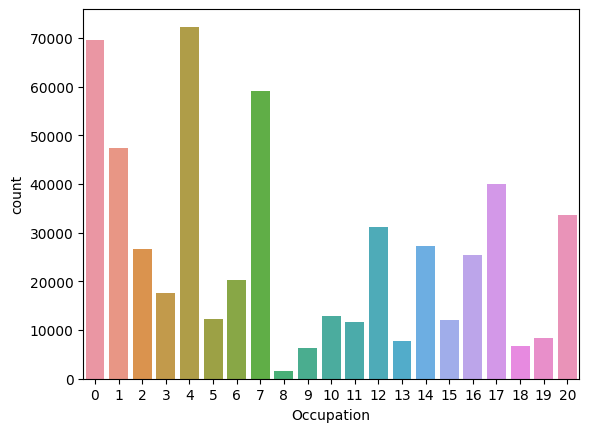

In [ ]:
sns.countplot(df,x="Occupation")

<Axes: xlabel='Age', ylabel='count'>

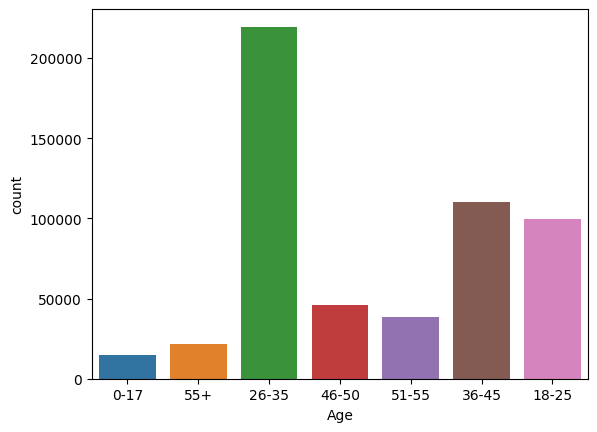

In [ ]:
sns.countplot(df,x="Age")

<Axes: xlabel='Gender', ylabel='count'>

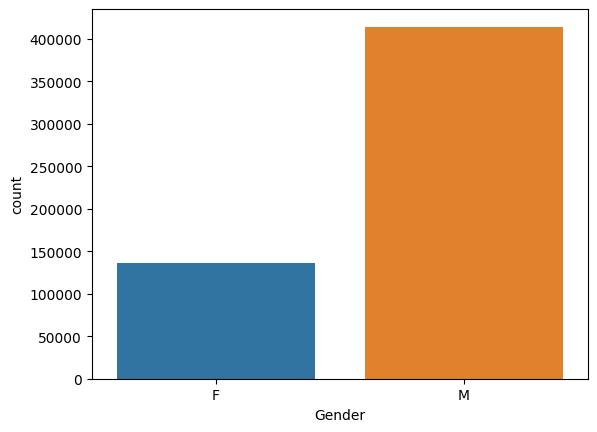

In [ ]:
sns.countplot(df,x="Gender")

<Axes: xlabel='Marital_Status', ylabel='count'>

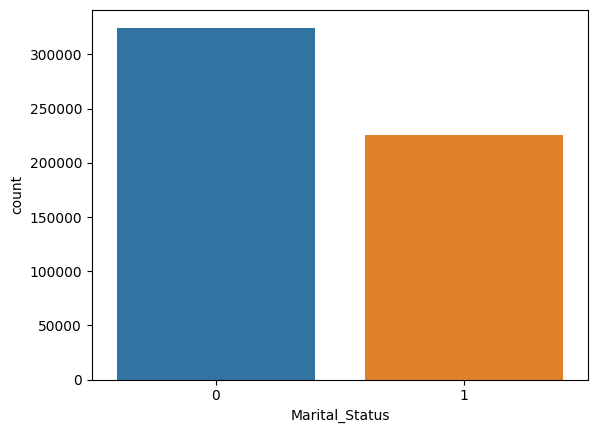

In [ ]:
sns.countplot(df,x="Marital_Status")

<Axes: xlabel='City_Category', ylabel='Count'>

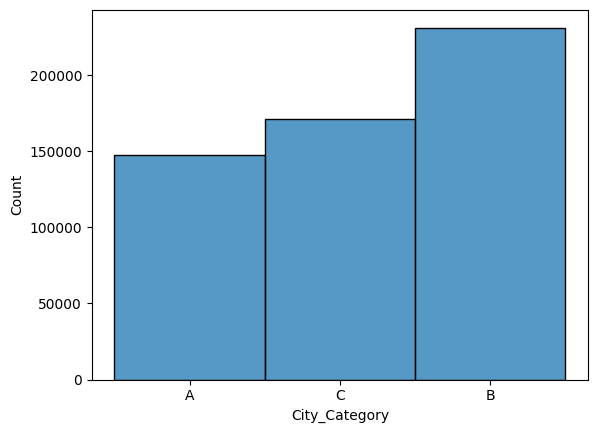

In [ ]:
sns.histplot(df,x='City_Category')

city category B where most customer order

<Axes: xlabel='City_Category', ylabel='Count'>

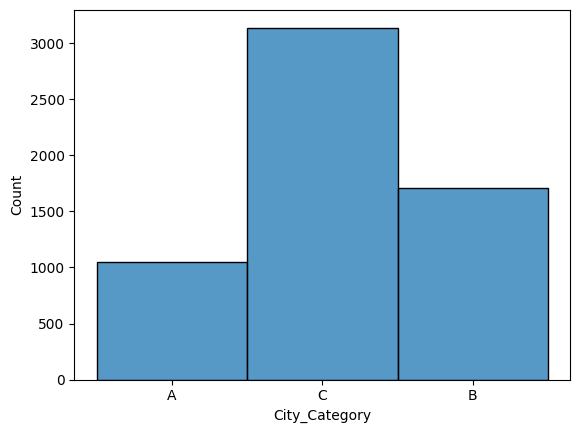

In [ ]:
sns.histplot(unique_gender,x="City_Category")

**Insights**

City Category C where most customers are live

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Count'>

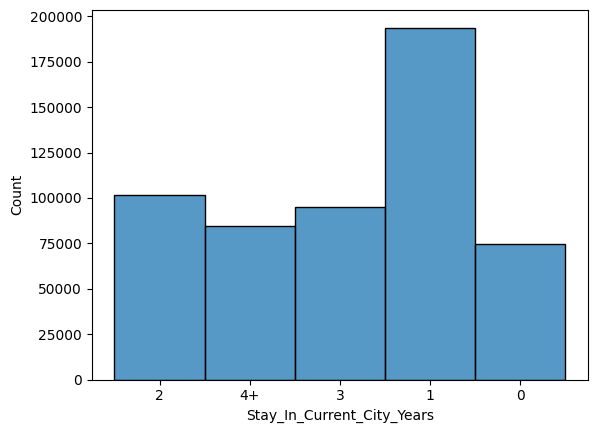

In [ ]:
sns.histplot(df,x='Stay_In_Current_City_Years')

<Axes: xlabel='Product_Category', ylabel='count'>

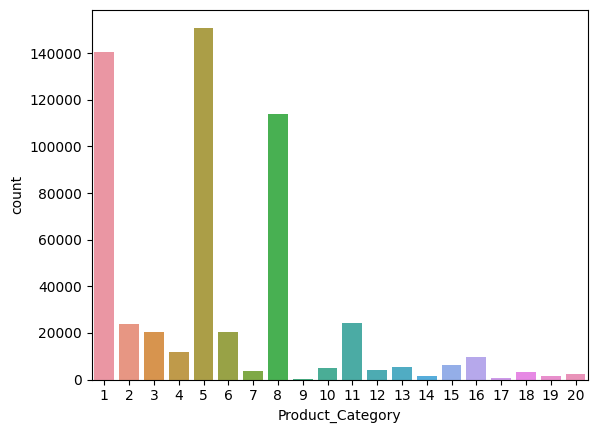

In [ ]:
sns.countplot(df,x="Product_Category")

<Axes: xlabel='Purchase', ylabel='Count'>

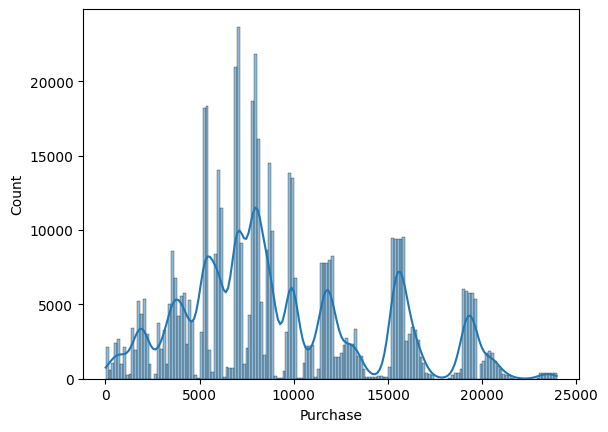

In [ ]:
sns.histplot(df,x='Purchase',kde=True)

1. We can clearly see from the graphs above the purchases done by males are much higher than females.
2. We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchases.
3. The purchases are highest from City category B.
4. Single customer purchases are higher than married users.

**Bivariate**

<Axes: xlabel='Age', ylabel='Occupation'>

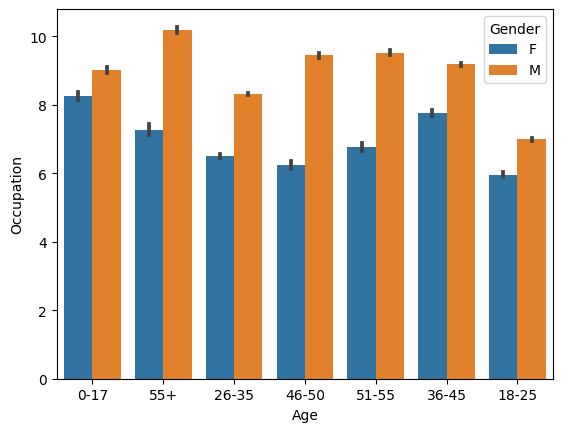

In [ ]:
sns.barplot(df,y='Occupation',x='Age',hue="Gender")

<Axes: xlabel='City_Category', ylabel='Occupation'>

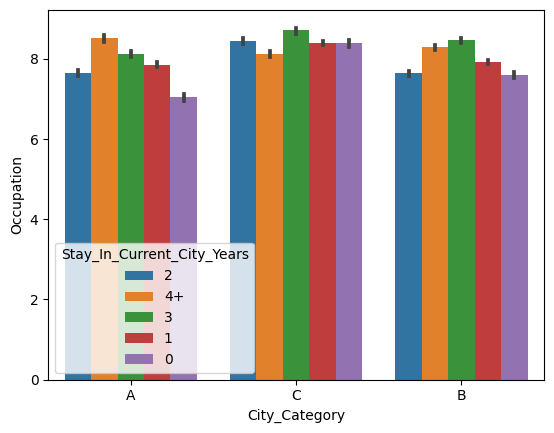

In [ ]:
sns.barplot(df,y='Occupation',x='City_Category',hue="Stay_In_Current_City_Years")

<Axes: xlabel='Gender', ylabel='Purchase'>

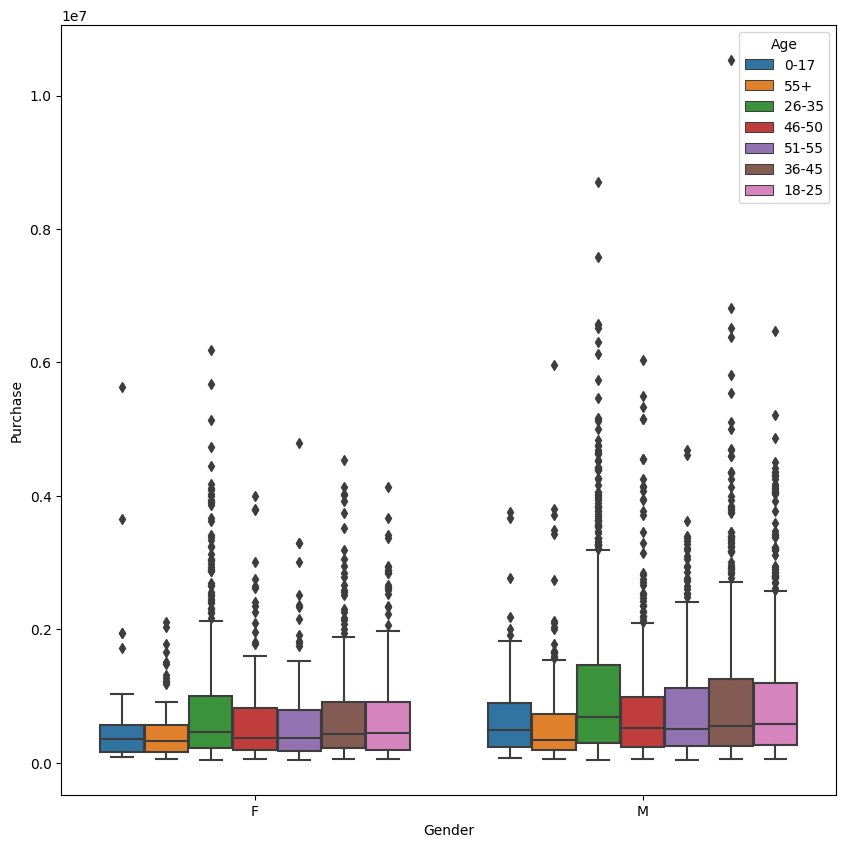

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(unique_gender,y="Purchase",x="Gender",hue="Age")

<Axes: xlabel='Gender', ylabel='Purchase'>

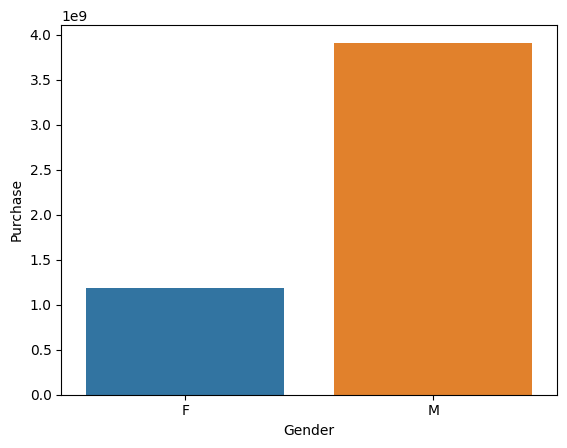

In [ ]:
spent=df.groupby(by="Gender")['Purchase'].sum()
spent=spent.reset_index()
sns.barplot(spent,x="Gender",y="Purchase")



**Multivariate**

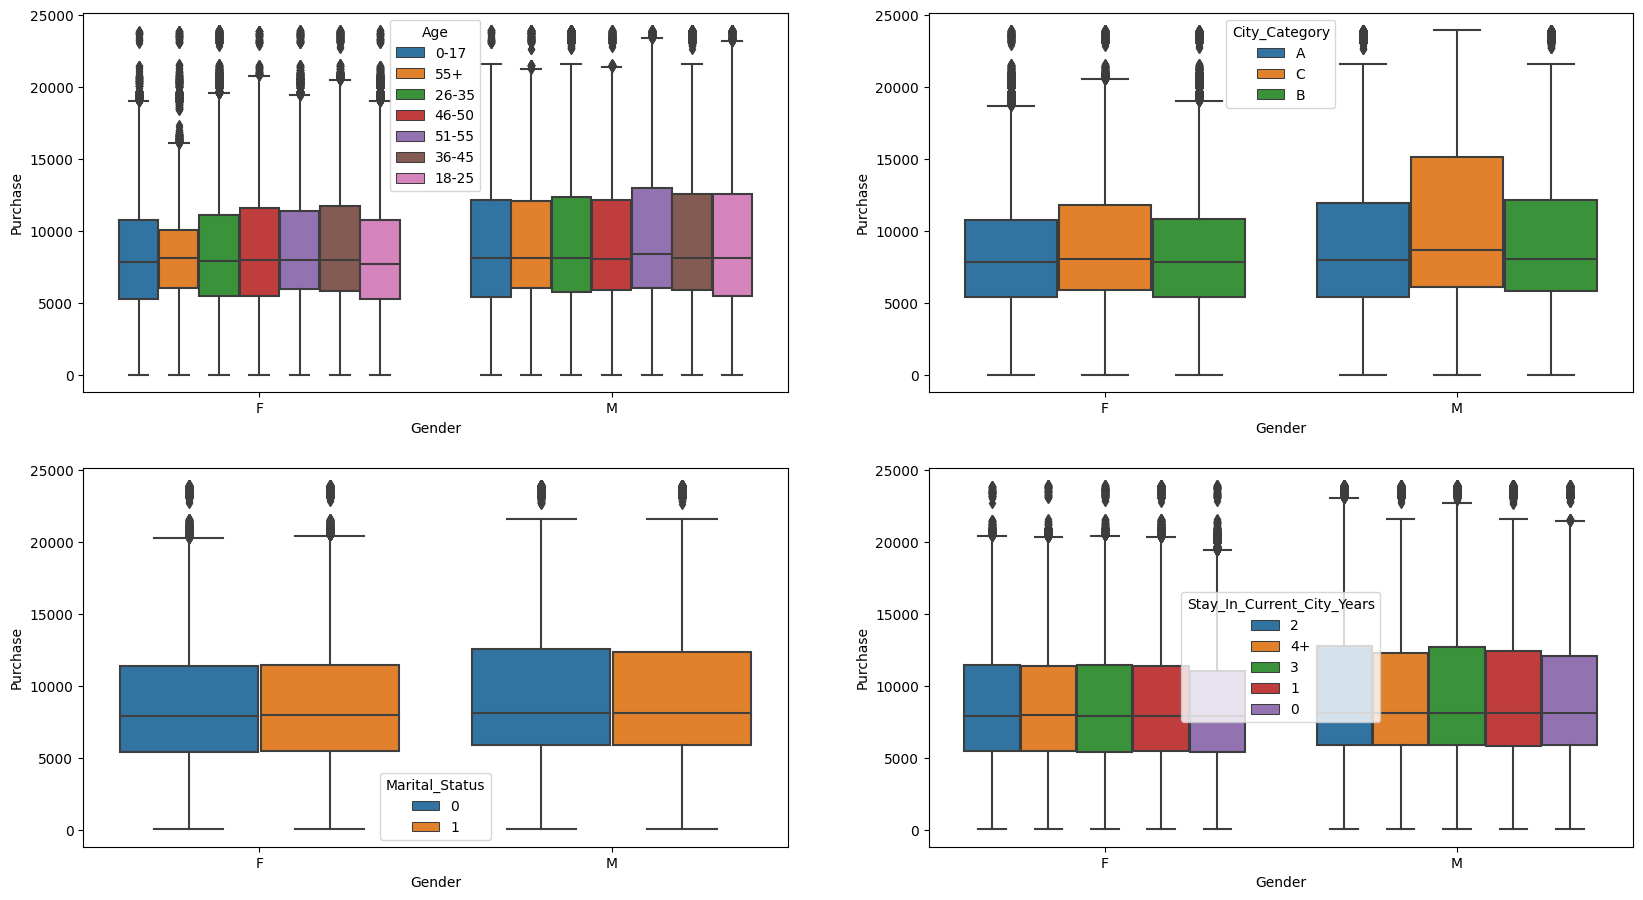

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

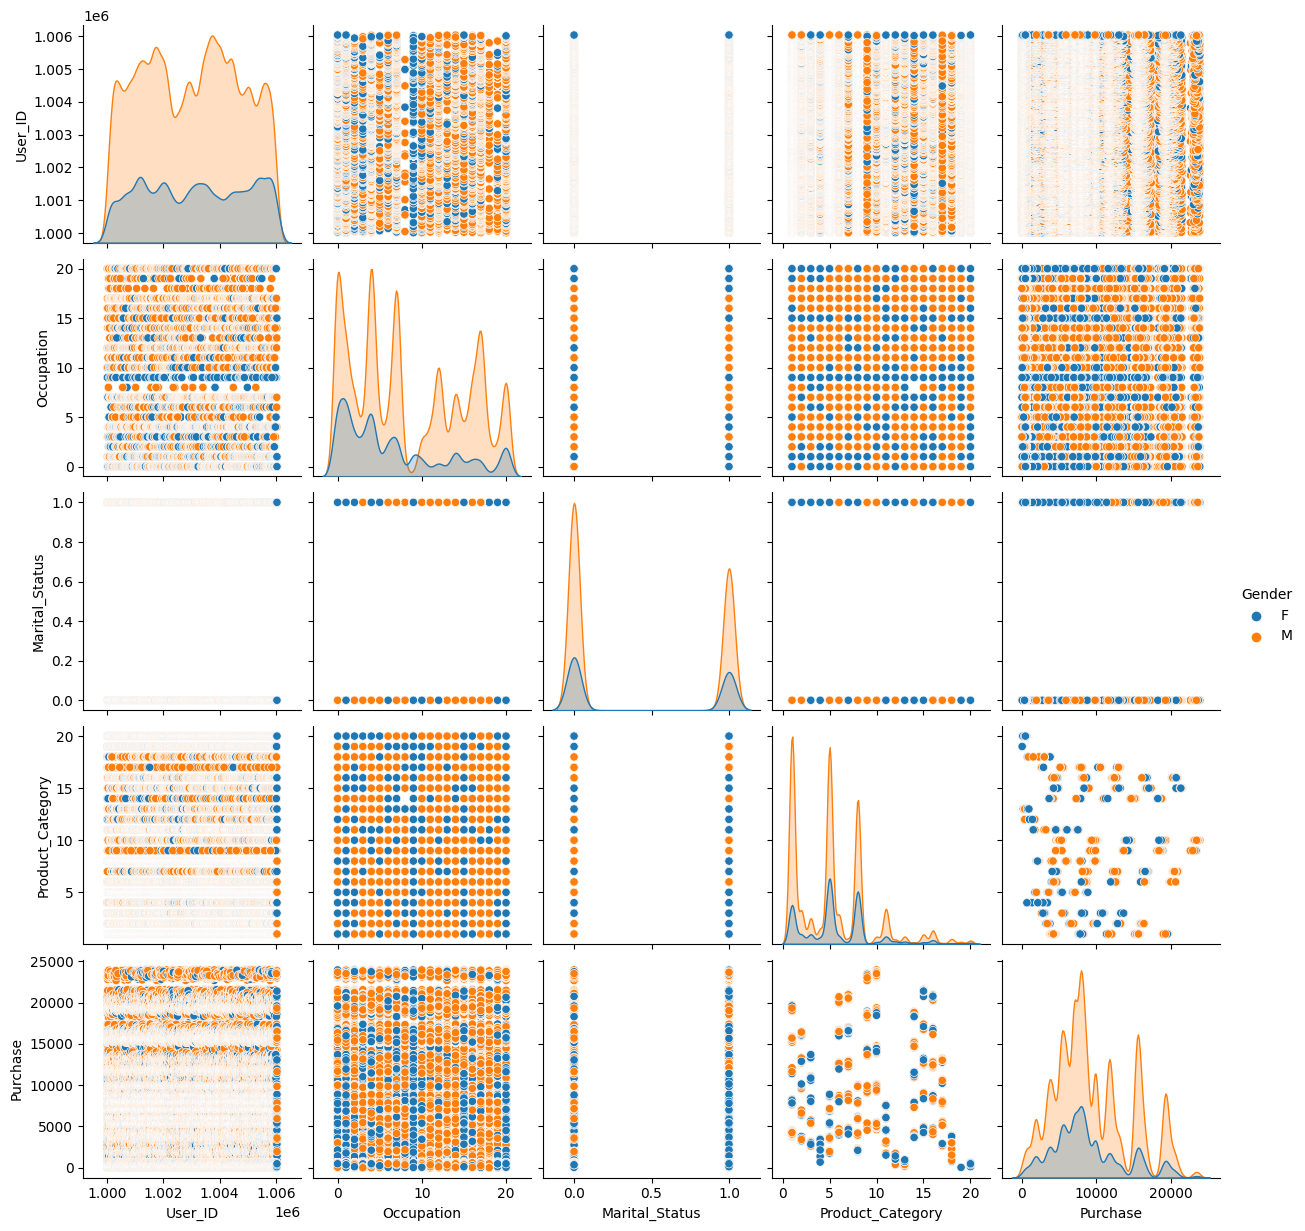

In [ ]:
sns.pairplot(df,hue="Gender")

**Correlation**


between variable

<ipython-input-29-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

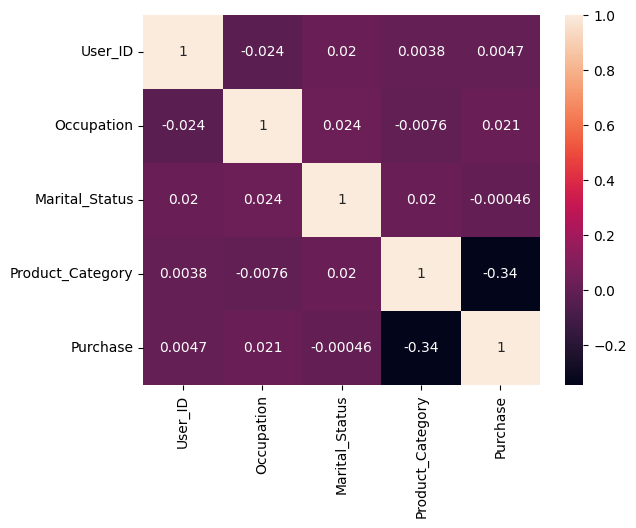

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
purchase= df.groupby(["User_ID","Gender"])[["Purchase"]].sum()
purchase.reset_index(inplace=True)
male_purchase=purchase.loc[purchase["Gender"]=="M"]["Purchase"]
female_purchase=purchase.loc[purchase["Gender"]=="F"]["Purchase"]

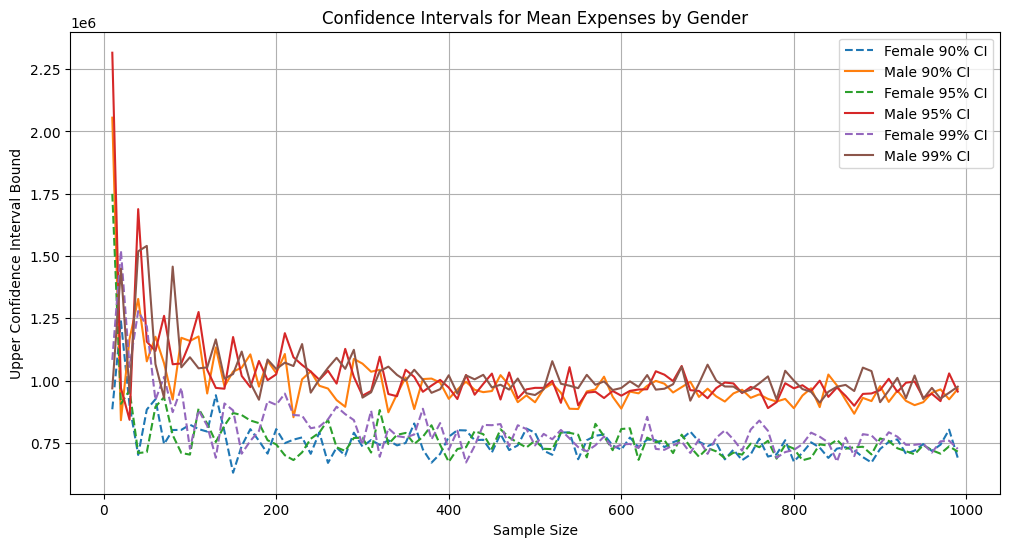

In [ ]:
# Sample data (replace with your actual data)
# Assuming df is your DataFrame with the 'Purchase' column for both genders


# Confidence levels to test
confidence_levels = [0.90, 0.95, 0.99]

# Sample sizes to observe
sample_sizes = range(10, 1000,10)

# Create empty lists to store results
female_intervals = {level: [] for level in confidence_levels}
male_intervals = {level: [] for level in confidence_levels}

# Loop through sample sizes and calculate confidence intervals
for sample_size in sample_sizes:
    for level in confidence_levels:
        # Randomly sample from the data
        female_sample = np.random.choice(female_purchase, size=sample_size)
        male_sample = np.random.choice(male_purchase, size=sample_size)

        # Calculate sample means
        female_mean = np.mean(female_sample)
        male_mean = np.mean(male_sample)

        # Calculate standard errors
        female_std = np.std(female_sample, ddof=1)
        male_std = np.std(male_sample, ddof=1)

        se_female = female_std / np.sqrt(sample_size)
        se_male = male_std / np.sqrt(sample_size)

        # Calculate critical values based on confidence level
        z_critical = stats.norm.ppf(1 - (1 - level) / 2)

        # Calculate margin of error
        margin_error_female = z_critical * se_female
        margin_error_male = z_critical * se_male

        # Calculate confidence intervals
        lower_ci_female = female_mean - margin_error_female
        upper_ci_female = female_mean + margin_error_female

        lower_ci_male = male_mean - margin_error_male
        upper_ci_male = male_mean + margin_error_male

        female_intervals[level].append((lower_ci_female, upper_ci_female))
        male_intervals[level].append((lower_ci_male, upper_ci_male))

# Plot the results
plt.figure(figsize=(12, 6))

for level in confidence_levels:
    female_lower = [interval[0] for interval in female_intervals[level]]
    female_upper = [interval[1] for interval in female_intervals[level]]
    male_lower = [interval[0] for interval in male_intervals[level]]
    male_upper = [interval[1] for interval in male_intervals[level]]

    plt.plot(sample_sizes, female_upper, label=f'Female {int(level * 100)}% CI', linestyle='--')
    plt.plot(sample_sizes, male_upper, label=f'Male {int(level * 100)}% CI')

plt.xlabel('Sample Size')
plt.ylabel('Upper Confidence Interval Bound')
plt.title('Confidence Intervals for Mean Expenses by Gender')
plt.legend()
plt.grid(True)

plt.show()


**male_purchase with CI 90 , 95 , 99**

In [ ]:
print("male_purchase with 90% confidence",(norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.05),norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.95)))
print("male_purchase with 95% confidence",(norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.025),norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.975)))
print("male_purchase with 99% confidence",(norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.005),norm(male_sample.mean(),male_sample.std(ddof=1)/np.sqrt(990)).ppf(0.995)))

male_purchase with 90% confidence (843340.1342264162, 946663.9486018666)
male_purchase with 95% confidence (833443.0821234862, 956561.0007047966)
male_purchase with 99% confidence (814099.8552068505, 975904.2276214324)


**Female_purchase with CI 90, 95,99**

In [ ]:
print("female_purchase with 90% confidence",(norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.05),norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.95)))
print("female_purchase with 95% confidence",(norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.025),norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.975)))
print("female_purchase with 99% confidence",(norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.005),norm(female_sample.mean(),female_sample.std(ddof=1)/np.sqrt(990)).ppf(0.995)))


female_purchase with 90% confidence (627127.49262213, 704640.8184889812)
female_purchase with 95% confidence (619702.7432609808, 712065.5678501304)
female_purchase with 99% confidence (605191.4918097191, 726576.8193013921)


**Calculate Confidence Interval**

Confidence intervals do not overlap. There is a statistically significant difference.


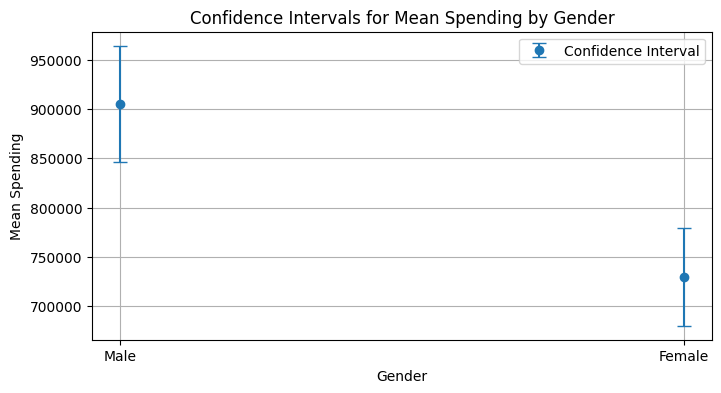

In [ ]:
# Sample data
male_spending = np.random.normal(loc=male_purchase.mean(), scale=male_purchase.std(ddof=1),size=1000)
female_spending = np.random.normal(loc=female_purchase.mean(), scale=female_purchase.std(ddof=1),size=1000)

# Parameters
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate statistics for male and female spending
male_mean = np.mean(male_spending)
female_mean = np.mean(female_spending)
male_std = np.std(male_spending, ddof=1)
female_std = np.std(female_spending, ddof=1)
n_male = len(male_spending)
n_female = len(female_spending)

# Calculate critical value (z-score) for the given confidence level
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate margin of error for both groups
male_margin_error = z_critical * (male_std / np.sqrt(n_male))
female_margin_error = z_critical * (female_std / np.sqrt(n_female))

# Calculate confidence intervals for both groups
male_confidence_interval = (male_mean - male_margin_error, male_mean + male_margin_error)
female_confidence_interval = (female_mean - female_margin_error, female_mean + female_margin_error)

# Plot confidence intervals
plt.figure(figsize=(8, 4))
plt.errorbar(x=[0, 1], y=[male_mean, female_mean], yerr=[male_margin_error, female_margin_error], fmt='o', capsize=5, label='Confidence Interval')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Mean Spending')
plt.legend()
plt.title('Confidence Intervals for Mean Spending by Gender')
plt.grid(True)

# Check for overlap
if male_confidence_interval[1] < female_confidence_interval[0] or female_confidence_interval[1] < male_confidence_interval[0]:
    print("Confidence intervals do not overlap. There is a statistically significant difference.")
else:
    print("Confidence intervals overlap. There may not be a statistically significant difference.")

plt.show()


In [ ]:
married=df.groupby(["Marital_Status","User_ID"])[["Purchase"]].sum()
married.reset_index(inplace=True)
single=married.loc[married["Marital_Status"]==0]["Purchase"].reset_index()
married=married.loc[married["Marital_Status"]==1]["Purchase"].reset_index()


In [ ]:
single_sample=[]
married_sample=[]
single_sample.append(np.random.choice(single["Purchase"],size=1000))
married_sample.append(np.random.choice(married["Purchase"],size=1000))
single_sample=np.array(single_sample)
married_sample=np.array(married_sample)

In [141]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("average purchase by single",single["Purchase"].mean())
print("average purchase by married",married["Purchase"].mean())
print()
print("median purchase by single",single["Purchase"].median())
print("median purchase by married",married["Purchase"].median())
print()
print("90% CI for single",(norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for single",(norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for single",(norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(single_sample.mean(),single_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()

print("90% CI for married",(norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for married",(norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for married",(norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(married_sample.mean(),married_sample.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))


average purchase by single 880575.7819724905
average purchase by married 843526.7966855295

median purchase by single 539673.0
median purchase by married 503338.5

90% CI for single (800608.2193717121, 902201.840628288)
95% CI for single (790876.8968399281, 911933.1631600719)
99% CI for single (779562.1313512077, 930952.4810310508)

90% CI for married (788678.2691897689, 884755.210810231)
95% CI for married (779475.3714565063, 893958.1085434937)
99% CI for married (768775.013994461, 911944.6501211005)


In [8]:
age_bin=df.groupby(["Age","User_ID"])[["Purchase"]].sum()
age_bin.reset_index(inplace=True)
age_17=age_bin.loc[age_bin["Age"]=="0-17"]
age_25=age_bin.loc[age_bin["Age"]=="18-25"]
age_35=age_bin.loc[age_bin["Age"]=="26-35"]
age_45=age_bin.loc[age_bin["Age"]=="36-45"]
age_50=age_bin.loc[age_bin["Age"]=="46-50"]
age_55=age_bin.loc[age_bin["Age"]=="51-55"]
age_55_=age_bin.loc[age_bin["Age"]=="55+"]

In [9]:
sample_0_17=np.random.choice(age_17["Purchase"],size=1000)
sample_18_25=np.random.choice(age_25["Purchase"],size=1000)
sample_26_35=np.random.choice(age_35["Purchase"],size=1000)
sample_36_45=np.random.choice(age_45["Purchase"],size=1000)
sample_46_50=np.random.choice(age_50["Purchase"],size=1000)
sample_51_55=np.random.choice(age_55["Purchase"],size=1000)
sample_55=np.random.choice(age_55_["Purchase"],size=1000)


In [14]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("average purchase by age_0_17",sample_0_17.mean())
print("average purchase by age_18_25",sample_18_25.mean())
print("average purchase by age_26_35",sample_26_35.mean())
print("average purchase by age_36_45",sample_36_45.mean())
print("average purchase by age_46_50",sample_46_50.mean())
print("average purchase by age_51_55",sample_51_55.mean())
print("average purchase by age_55+",sample_55.mean())
print()

print("90% CI for age_0_17",(norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_0_17",(norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_0_17",(norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_0_17.mean(),sample_0_17.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()

print("90% CI for age_18_25",(norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_18_25",(norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_18_25",(norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_18_25.mean(),sample_18_25.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()

print("90% CI for age_26_35",(norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_26_35",(norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_26_35",(norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_26_35.mean(),sample_26_35.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()

print("90% CI for age_36_45",(norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_36_45",(norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_36_45",(norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_36_45.mean(),sample_36_45.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()

print("90% CI for age_46_50",(norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_46_50",(norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_46_50",(norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_46_50.mean(),sample_46_50.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()
print("90% CI for age_51_55",(norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_51_55",(norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_51_55",(norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_51_55.mean(),sample_51_55.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))
print()
print("90% CI for age_55+",(norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.05),norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.95)))
print("95% CI for age_55+",(norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.025),norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.975)))
print("99% CI for age_55+",(norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.01),norm(sample_55.mean(),sample_55.std(ddof=1)/np.sqrt(1000)).ppf(0.995)))


average purchase by age_0_17 635191.187
average purchase by age_18_25 861937.254
average purchase by age_26_35 1049897.278
average purchase by age_36_45 876243.839
average purchase by age_46_50 751028.436
average purchase by age_51_55 787619.6
average purchase by age_55+ 536298.674

90% CI for age_0_17 (601415.8379664471, 668966.536033553)
95% CI for age_0_17 (594945.3763173048, 675436.9976826953)
99% CI for age_0_17 (587422.0663124537, 688083.1479336062)

90% CI for age_18_25 (815938.2390114269, 907936.268988573)
95% CI for age_18_25 (807126.0469572099, 916748.46104279)
99% CI for age_18_25 (796879.9692828372, 933971.3905338078)

90% CI for age_26_35 (993899.6152759789, 1105894.9407240208)
95% CI for age_26_35 (983171.9473327865, 1116622.6086672132)
99% CI for age_26_35 (970698.7149821336, 1137589.227126265)

90% CI for age_36_45 (825128.6919897803, 927358.9860102198)
95% CI for age_36_45 (815336.384644819, 937151.2933551811)
99% CI for age_36_45 (803950.7111312929, 956289.802584101)


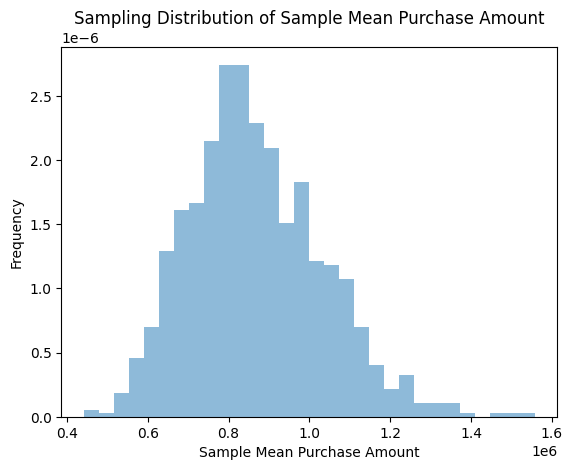

In [ ]:
numeric_column = male_purchase["Purchase"]

# Number of samples to generate
num_samples = 1000

# Sample size
sample_size = 30

# Initialize an empty list to store sample means
sample_means = []

# Perform random sampling and calculate sample means
for i in range(num_samples):
    sample = np.random.choice(numeric_column, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Create a histogram of the sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.5)
plt.xlabel('Sample Mean Purchase Amount')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Sample Mean Purchase Amount')
plt.show()


**Recommendations:**

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

**Question:**


1.Are women spending more money per transaction than men? Why or Why not?

Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).

The reason for less purchase by women could have several factors:

  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
  If the female based products quality/quantity needs to be improved for women purchasing.

2. Confidence intervals and distribution of the mean of the expenses by female and male customers.

At 99% Confidence Interval with sample size 1000

Average amount spend by male customers lie in the range 8,14,011.28 - 9,77,154.61

Average amount spend by female customers lie in range 6,09,678.88 - 7,23,811.31


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

4. Results when the same activity is performed for Married vs Unmarried

At 99% Confidence Interval with sample size 1000

Average amount spend by married customers lie in the range:  [761059.6309378392, 915078.140167503]
Average amount spend by unmarried customers lie in the range:  [779093.3492016713, 934078.6782803286]

5. Results when the same activity is performed for Age

At 99% Confidence Interval with sample size 1000

For age 26-35 confidence interval of means: (931009.46,1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)